In [53]:
%pwd

'/Users/sven/gh/fullstack-ml-academy-homework/notepads/05-Explorative-Datenanalyse'

## Lageparameter
- Arithmetisches Mittel / Durchschnitt / average
- Getrimmtes Mittel / truncated mean
- Gewichtetes Mittel aka. weighted arithmetic mean
- Median

## Streuungsmaße
- Spannweite aka. range
- Mittlere Absolute Abweichung aka. mean absolute deviation
- Varianz aka. variance
- Standardabweichung aka. standard deviation
- Quantil, Perzentil, Quartil
- Interquartilsabstand / Spannweite vom Perzentil 25 zum Perzentil 75 / interquartil range
- Variationskoeffizient
- Empirischer Quartilsdispersionskoeffizient

## Verteilungen
- Dichtefunktion / density function 


In [54]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


In [55]:
pd.options.display.float_format = '{:.0f}'.format
data_all = pd.read_csv("../../data/Census-Datensatz.csv", sep=';', skipinitialspace=True)
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
description = data_all.describe()
print(f"data_all.description={description}\n")

data_all.description=        age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
count 32561   32561          32561         32561         32561           32561
mean     39  189778             10          1078            87              40
std      14  105550              3          7385           403              12
min      17   12285              1             0             0               1
25%      28  117827              9             0             0              40
50%      37  178356             10             0             0              40
75%      48  237051             12             0             0              45
max      90 1484705             16         99999          4356              99



In [57]:
print(f"data_all.head={data_all.head()}\n")

data_all.head=   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             

In [58]:
# retain only the numeric columns
numeric_or_ordinal_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
data = data_all[numeric_or_ordinal_columns]
# add column income_cat
income_column = ['income']
income_data = data_all[income_column]
income_data_codes = income_data.income.astype('category').cat.codes
data['income-cat'] = income_data_codes
# sort by age
data_sorted = data.sort_values(by='capital-gain', ascending=True)
# ensure datatype int32
data_int = data_sorted.astype('int32')
# data_int.describe(percentiles=[.05, .10, .25, .5, .75, .90, .95, .96, .97, .98, .99]).apply('{:.0f}'.format)
# raises error with message unsupported format string passed to Series.__format__
# so instead we use pd.options.display.float_format = '{:.0f}'.format right after importing pandas
print(data_int.describe(percentiles=[.05, .10, .25, .5, .75, .90, .95, .96, .97, .98, .99]))
data_int.head

        age  fnlwgt  capital-gain  capital-loss  hours-per-week  income-cat
count 32561   32561         32561         32561           32561       32561
mean     39  189778          1078            87              40           0
std      14  105550          7385           403              12           0
min      17   12285             0             0               1           0
5%       19   39460             0             0              18           0
10%      22   65716             0             0              24           0
25%      28  117827             0             0              40           0
50%      37  178356             0             0              40           0
75%      48  237051             0             0              45           0
90%      58  329054             0             0              55           1
95%      63  379682          5013             0              60           1
96%      65  397685          7298          1590              60           1
97%      67 

/var/folders/h2/lkcg_8md1x38x9b_fv91s7pw0000gn/T/ipykernel_3561/1305629387.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['income-cat'] = income_data_codes


<bound method NDFrame.head of        age  fnlwgt  capital-gain  capital-loss  hours-per-week  income-cat
16280   27  187981             0             0              40           0
19989   42   68729             0             0              40           0
19988   38  299036             0             0              55           1
19987   45  187581             0             0              40           0
19986   19  385901             0             0              22           0
...    ...     ...           ...           ...             ...         ...
15100   62  245491         99999             0              40           1
10661   59  122283         99999             0              40           1
2103    43  172826         99999             0              55           1
25178   45  148995         99999             0              30           1
6524    49  362795         99999             0              80           1

[32561 rows x 6 columns]>

In [59]:
print(data_int.median(numeric_only=True))

age                  37
fnlwgt           178356
capital-gain          0
capital-loss          0
hours-per-week       40
income-cat            0
dtype: float64


In [60]:
print(data_int.mean(numeric_only=True))

age                  39
fnlwgt           189778
capital-gain       1078
capital-loss         87
hours-per-week       40
income-cat            0
dtype: float64


In [61]:
print(data_int.mode(numeric_only=True, dropna=True))

   age  fnlwgt  capital-gain  capital-loss  hours-per-week  income-cat
0   36  123011             0             0              40           0
1  NaN  164190           NaN           NaN             NaN         NaN
2  NaN  203488           NaN           NaN             NaN         NaN


array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fnlwgt', ylabel='age'>,
        <Axes: xlabel='capital-gain', ylabel='age'>,
        <Axes: xlabel='capital-loss', ylabel='age'>,
        <Axes: xlabel='hours-per-week', ylabel='age'>,
        <Axes: xlabel='income-cat', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fnlwgt'>,
        <Axes: xlabel='fnlwgt', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-gain', ylabel='fnlwgt'>,
        <Axes: xlabel='capital-loss', ylabel='fnlwgt'>,
        <Axes: xlabel='hours-per-week', ylabel='fnlwgt'>,
        <Axes: xlabel='income-cat', ylabel='fnlwgt'>],
       [<Axes: xlabel='age', ylabel='capital-gain'>,
        <Axes: xlabel='fnlwgt', ylabel='capital-gain'>,
        <Axes: xlabel='capital-gain', ylabel='capital-gain'>,
        <Axes: xlabel='capital-loss', ylabel='capital-gain'>,
        <Axes: xlabel='hours-per-week', ylabel='capital-gain'>,
        <Axes: xlabel='income-cat', ylabel='capital-gain'>],
       [<Axes: x

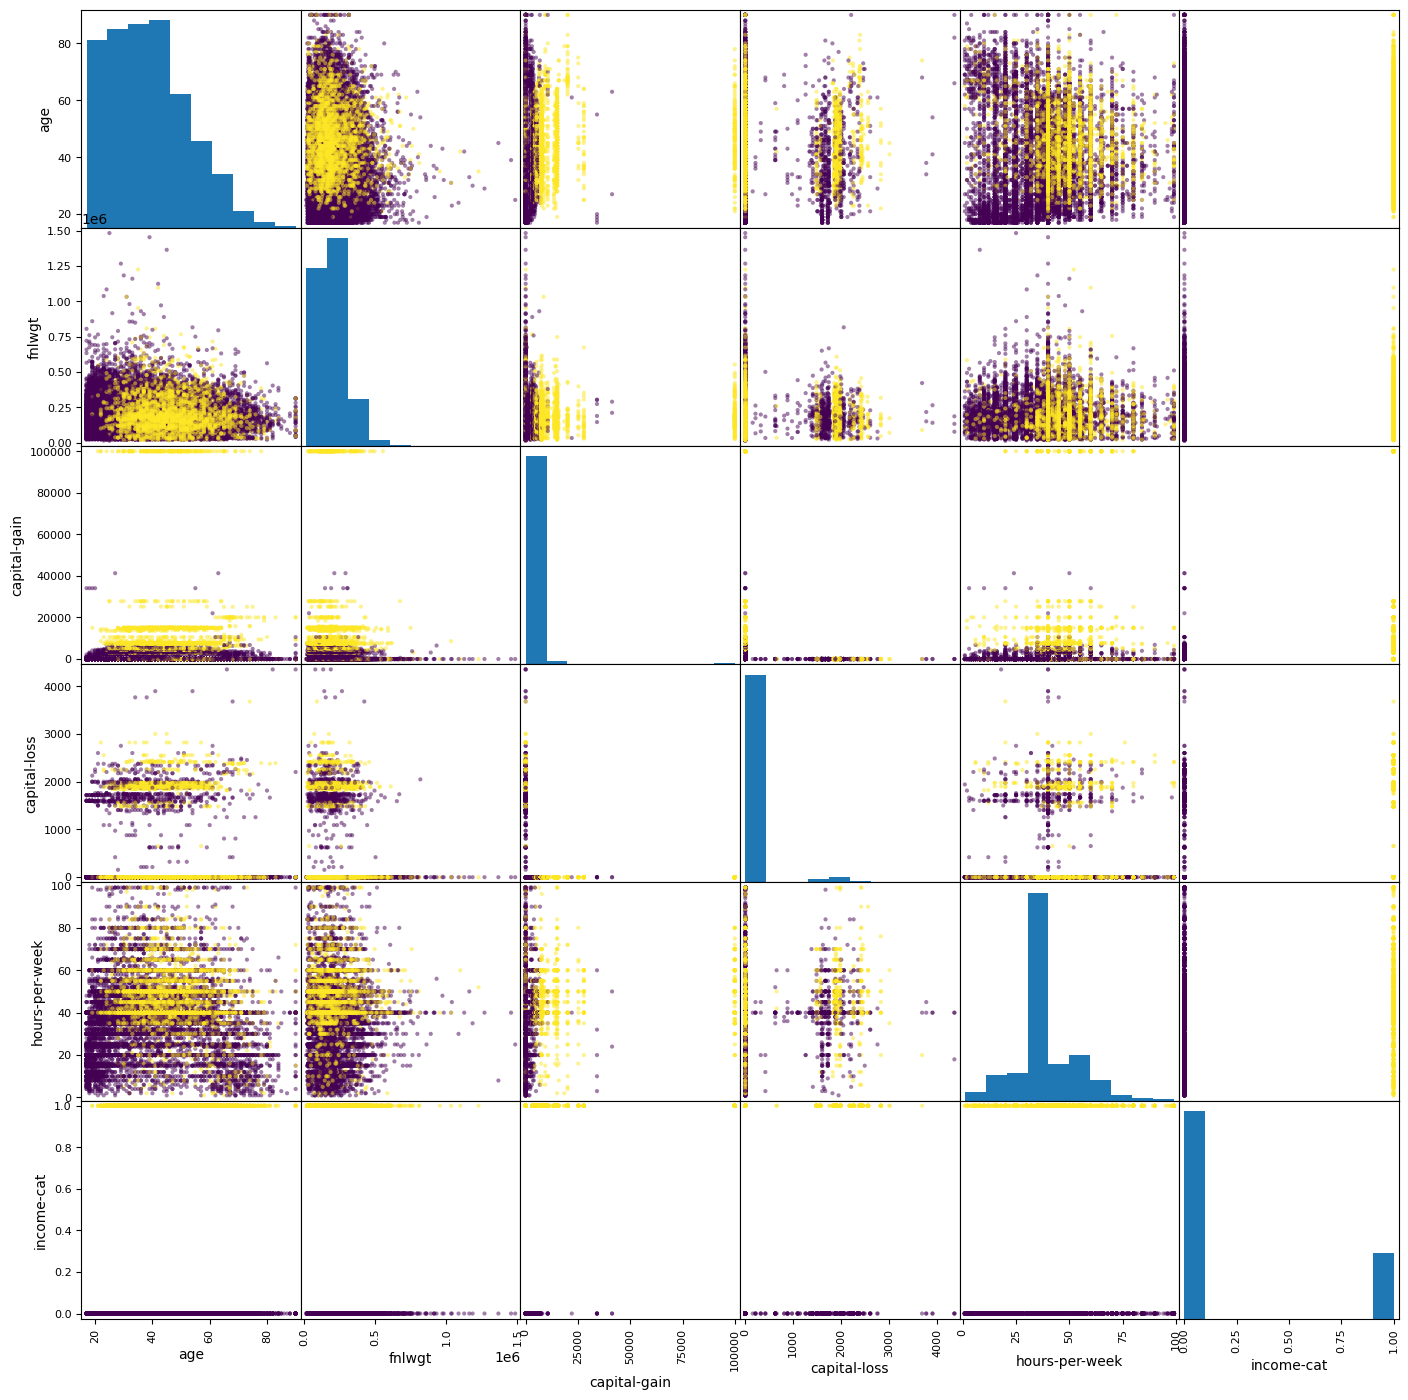

In [62]:
pd.plotting.scatter_matrix(data_int, 
                           c=data_int['income-cat'], 
                           figsize=(17, 17)
                          )